## Linear regression model to predict house proces

Checking for null values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


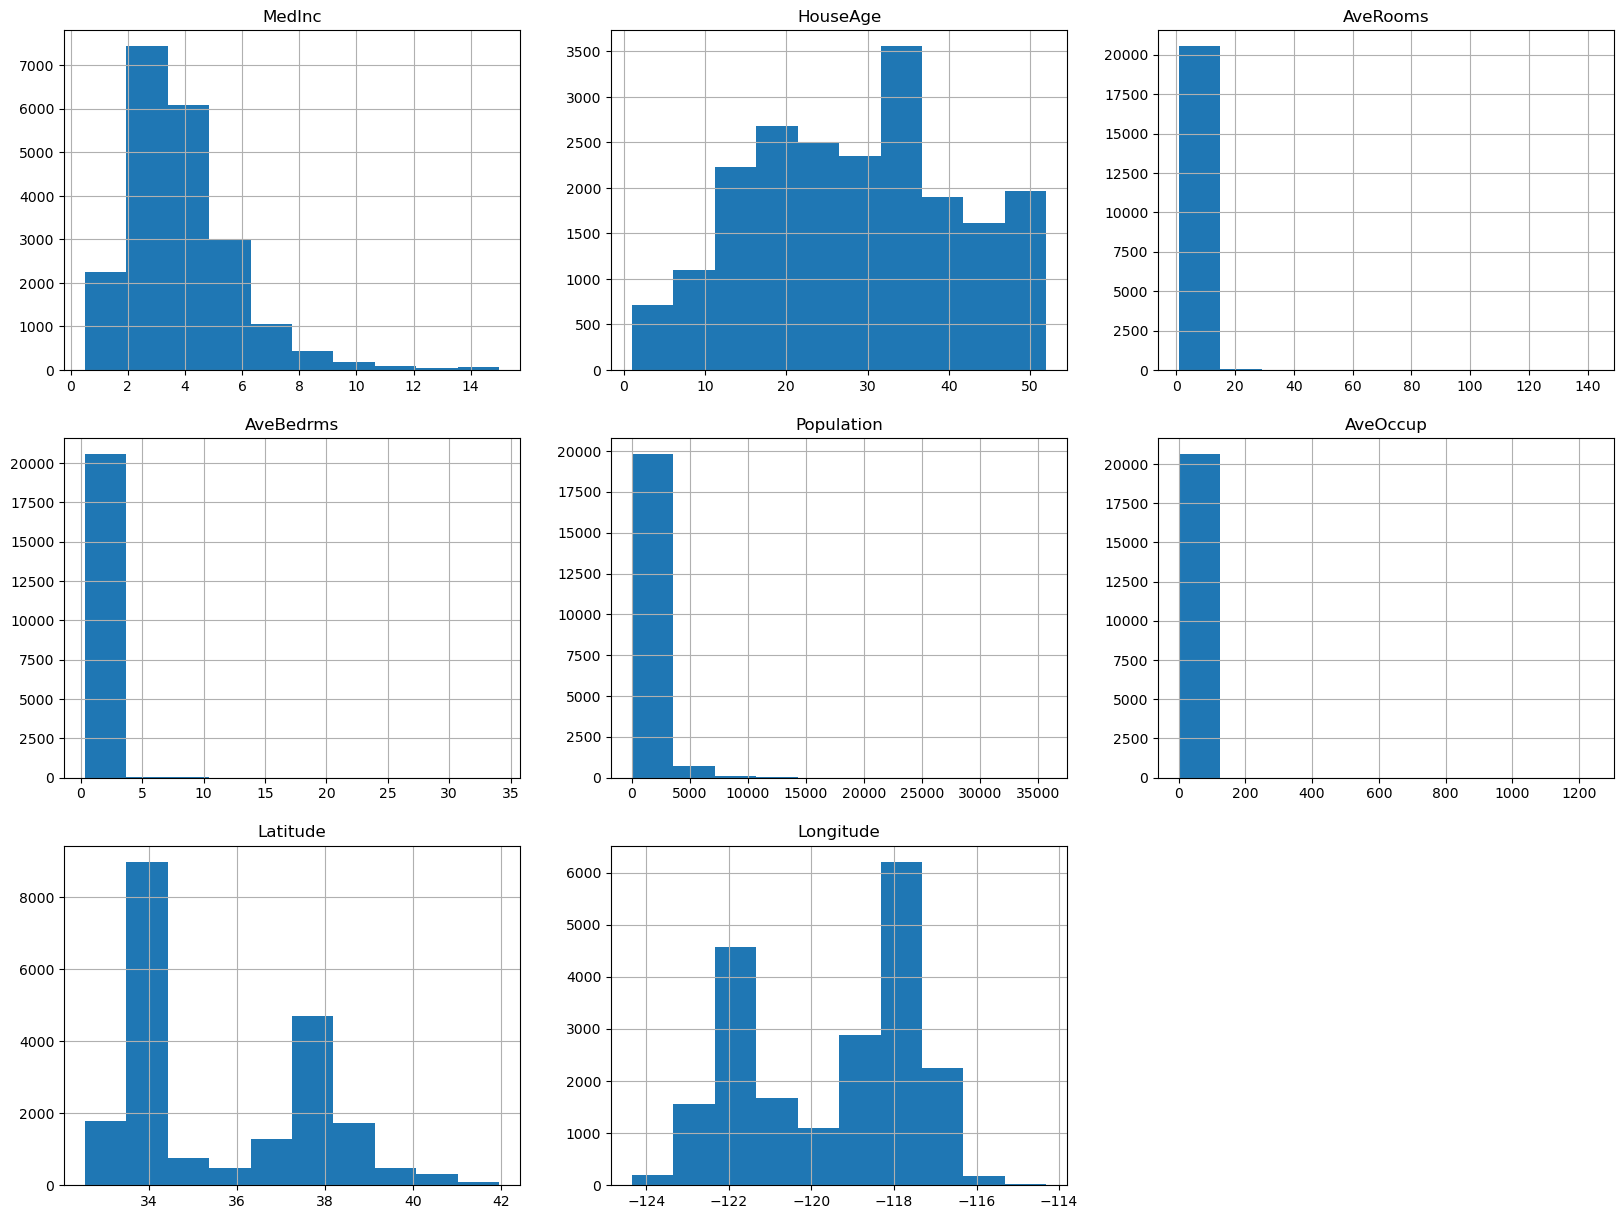

Linear Regression MSE: 0.5558915986952441
Linear Regression 5-fold CV MSE: 0.5582901717686551


In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the California housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Dataset Preparation
# Check for null values
print("Checking for null values:\n", X.isnull().sum())

# Exploratory Data Analysis (EDA)
# Visualizing some features - using histograms for distribution
plt.figure(figsize=(20, 15))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    X[feature].hist()
    plt.title(feature)
plt.show()

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and model evaluation
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

# Evaluate the model using 5-fold cross-validation
cv_scores = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"Linear Regression 5-fold CV MSE: {np.mean(np.abs(cv_scores))}")

